# **40 Paper-scissors-stone. . . and jelly babies!**

---

*   Four children play a long sequence of paper-scissors-stone games in pairs.*

*   They divide up 40 jelly babies, starting with 10 each.

*   The eldest child begins the sequence by choosing an opponent at random, then the next eldest chooses at random, and so on, to complete the round of 4 games.

*   If a child wins a game, the loser gives the winner a jelly
baby.

*   If the game is a draw no sweets are exchanged.

*   In each game, there is an equal probability of winning, losing or drawing.

---

There are two versions of the rules:

(a)   If a child, at any time, has no sweets, they are eliminated.

(b)   If a child with no sweets plays a child with sweets, they automatically win.

---

Carry out a computer simulation of the game.

For case (a) find out how long (how many rounds), on average, the game lasts. How does the duration of the game vary with the number of children and the number of sweets?

For case (b) find out the fraction of time the oldest child has no sweets, and the fraction of time when they have all the sweets. Can you explain these values mathematically?

---
Code for different win probabilities case (a)



Probability Set 1:
child1: Win = 0.7339, Draw = 0.1172, Lose = 0.1489
child2: Win = 0.5804, Draw = 0.2396, Lose = 0.1800
child3: Win = 0.6366, Draw = 0.2479, Lose = 0.1155
child4: Win = 0.7332, Draw = 0.1582, Lose = 0.1085
Average Rounds: 331.846

Probability Set 2:
child1: Win = 0.7811, Draw = 0.1093, Lose = 0.1096
child2: Win = 0.5792, Draw = 0.2905, Lose = 0.1303
child3: Win = 0.6580, Draw = 0.1046, Lose = 0.2374
child4: Win = 0.2690, Draw = 0.3160, Lose = 0.4150
Average Rounds: 112.464

Probability Set 3:
child1: Win = 0.5970, Draw = 0.1174, Lose = 0.2855
child2: Win = 0.7686, Draw = 0.1062, Lose = 0.1252
child3: Win = 0.6575, Draw = 0.2385, Lose = 0.1040
child4: Win = 0.2706, Draw = 0.4295, Lose = 0.2999
Average Rounds: 208.643

Probability Set 4:
child1: Win = 0.5017, Draw = 0.3430, Lose = 0.1553
child2: Win = 0.2878, Draw = 0.2980, Lose = 0.4143
child3: Win = 0.1970, Draw = 0.6097, Lose = 0.1933
child4: Win = 0.4819, Draw = 0.3772, Lose = 0.1409
Average Rounds: 392.72

Probabil

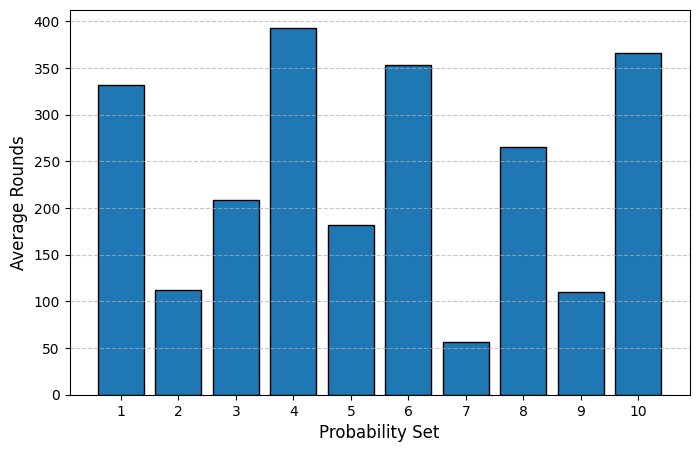

In [ ]:
#Imports
import random
import numpy as np
import matplotlib.pyplot as plt

#Children class with varying win probabilities
class childrenClass:

  #Initialisation
  def __init__(self, name, jellyBabyCount, winProb, drawProb, loseProb):
    self.Name = name
    self.JellyBabyCount = jellyBabyCount
    self.WinProb = winProb
    self.DrawProb = drawProb
    self.LoseProb = loseProb

  #Represent
  def __repr__(self):
    return f"childrenClass(child={self.Name}, count={self.JellyBabyCount}, winProb={self.WinProb}, drawProb={self.DrawProb}, loseProb={self.LoseProb})"

  #Getters and setters
  @property
  def name(self):
    return self.Name

  @name.setter
  def name(self, value):
    self.Name = value

  @property
  def jellyBabyCount(self):
    return self.JellyBabyCount

  @jellyBabyCount.setter
  def jellyBabyCount(self, value):
    self.JellyBabyCount = value

  @property
  def winProb(self):
    return self.WinProb

  @winProb.setter
  def winProb(self, value):
    self.WinProb = value

  @property
  def drawProb(self):
    return self.DrawProb

  @drawProb.setter
  def drawProb(self, value):
    self.DrawProb = value

  @property
  def loseProb(self):
    return self.LoseProb

  @loseProb.setter
  def drawProb(self, value):
    self.LoseProb = value

#Playing a game with varying win probability
def playGame(child, opponent):

  #Selecting game outcome based on weighted probabilities
  outcome = random.choices([-1, 0, 1], weights=[child.LoseProb, child.DrawProb, child.WinProb], k=1)[0]

  #Determining outcome and updating accordingly
  if outcome == 1 and opponent.jellyBabyCount > 0:
    child.jellyBabyCount += 1
    opponent.jellyBabyCount -= 1
  elif outcome == -1 and child.jellyBabyCount > 0:
    child.jellyBabyCount -= 1
    opponent.jellyBabyCount += 1

#Playing a round of games
def playRound(activeChildren):

  #Copying active children list
  playingList = activeChildren.copy()

  for player in playingList:

    #Getting an opponent
    opponentList = [child for child in activeChildren if child != player]
    opponent = random.choice(opponentList)

    #Skipping if a player or opponent has no jelly babies
    if player.jellyBabyCount == 0 or opponent.jellyBabyCount == 0:
      continue

    #Playing the game
    playGame(player, opponent)

    #If a child has no jelly babies then removed
    activeChildren = [child for child in activeChildren if child.jellyBabyCount > 0]

    #Stopping when we have a winner
    if len(activeChildren) < 2:
      return activeChildren

  return activeChildren

#Running the simulation
def simulation(childrenNames, sweetsPerChild, numSims, winProbs, drawProbs, loseProbs):

  #Declaring variables
  roundsCount = []
  activeChildren = []

  for _ in range(numSims):

    #Setting up childrenList
    activeChildren = [childrenClass(name, sweetsPerChild, winProbs[i], drawProbs[i], loseProbs[i]) for i, name in enumerate(childrenNames)]

    rounds = 0

    while len(activeChildren) > 1:

      #Playing a round
      activeChildren = playRound(activeChildren)
      rounds += 1

    #Adding round to the list
    roundsCount.append(rounds)

  return roundsCount

#Declaring variables
childrenNames = [f'child{i+1}' for i in range(4)]
numSims = 1000
sweetsPerChild = 10
numProbVariations = 9
averageRounds = []

#Setting seed
seed = 20
random.seed(seed)
np.random.seed(seed)

#Running multiple simulations with varying win probabilities
for variation in range(1, numProbVariations + 1):

  #Getting win draw and lose probabilities
  winProbs = [random.uniform(0.1, 0.8) for _ in childrenNames]
  drawProbs = [random.uniform(0.1, 0.9 - winProb) for winProb in winProbs]
  loseProbs = [1 - (winProbs[i] + drawProbs[i]) for i in range(len(winProbs))]

  #Printing probability set
  print(f"\nProbability Set {variation}:")
  for i, name in enumerate(childrenNames):
    print(f"{name}: Win = {winProbs[i]:.4f}, Draw = {drawProbs[i]:.4f}, Lose = {loseProbs[i]:.4f}")

  averageRoundCount = np.average(simulation(childrenNames, sweetsPerChild, numSims, winProbs, drawProbs, loseProbs))

  #Running the simulation and storing the result
  averageRounds.append(averageRoundCount)

  print(f'Average Rounds: {averageRoundCount}')

#Setting seed
random.seed(seed)
np.random.seed(seed)

#Running the simulation and storing the result
averageRounds.append(np.average(simulation(childrenNames, sweetsPerChild, numSims, [1/3] * len(childrenNames), [1/3] * len(childrenNames), [1/3] * len(childrenNames))))
numProbVariations += 1

print(averageRounds[-1])

#Plotting the results
plt.figure(figsize=(8, 5))
plt.bar(range(1, numProbVariations + 1), averageRounds, edgecolor='black')
plt.xlabel("Probability Set", fontsize=12)
plt.ylabel("Average Rounds", fontsize=12)
plt.xticks(range(1, numProbVariations + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('aProb.pdf')

---
Code for different win probabilities for case (b)



Probability Set 1:
child1: Win = 0.734, Draw = 0.117, Lose = 0.149
child2: Win = 0.580, Draw = 0.240, Lose = 0.180
child3: Win = 0.637, Draw = 0.248, Lose = 0.116
child4: Win = 0.733, Draw = 0.158, Lose = 0.109
Time Empty: 0.019887
Time Full: 6e-06

Probability Set 2:
child1: Win = 0.523, Draw = 0.373, Lose = 0.104
child2: Win = 0.653, Draw = 0.136, Lose = 0.211
child3: Win = 0.118, Draw = 0.153, Lose = 0.729
child4: Win = 0.117, Draw = 0.656, Lose = 0.227
Time Empty: 0.01388
Time Full: 0.000437

Probability Set 3:
child1: Win = 0.686, Draw = 0.113, Lose = 0.201
child2: Win = 0.168, Draw = 0.563, Lose = 0.269
child3: Win = 0.101, Draw = 0.768, Lose = 0.131
child4: Win = 0.705, Draw = 0.142, Lose = 0.153
Time Empty: 0.063103
Time Full: 4e-06

Probability Set 4:
child1: Win = 0.614, Draw = 0.105, Lose = 0.281
child2: Win = 0.175, Draw = 0.180, Lose = 0.646
child3: Win = 0.757, Draw = 0.137, Lose = 0.106
child4: Win = 0.746, Draw = 0.143, Lose = 0.111
Time Empty: 0.125393
Time Full: 0.0


<ipython-input-8-caf95a6a72a6>:206: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('BProbEldestNone.pdf')
<ipython-input-8-caf95a6a72a6>:206: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('BProbEldestNone.pdf')
<ipython-input-8-caf95a6a72a6>:219: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('BProbEldestFull.pdf')
<ipython-input-8-caf95a6a72a6>:219: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('BProbEldestFull.pdf')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


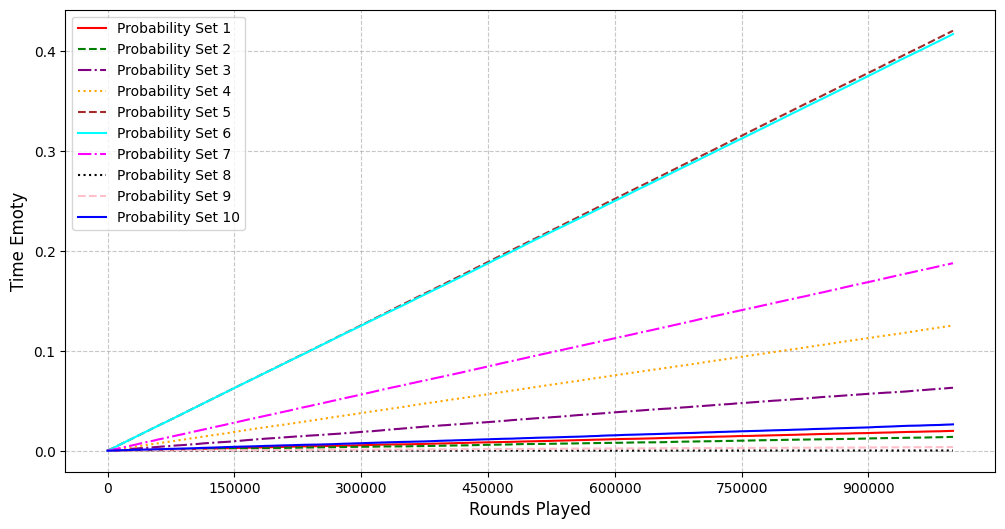

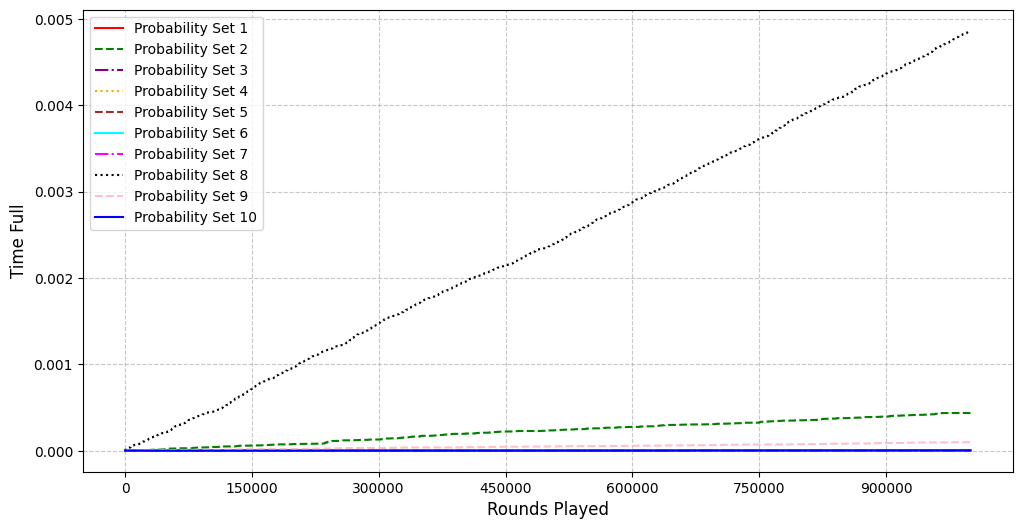

In [ ]:
#Imports
import random as random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#Children class with varying win probabilities
class childrenClass:

  #Initialisation
  def __init__(self, name, jellyBabyCount, winProb, drawProb, loseProb):
    self.Name = name
    self.JellyBabyCount = jellyBabyCount
    self.WinProb = winProb
    self.DrawProb = drawProb
    self.LoseProb = loseProb

  #Represent
  def __repr__(self):
    return f"childrenClass(child={self.Name}, count={self.JellyBabyCount}, winProb={self.WinProb}, drawProb={self.DrawProb}, loseProb={self.LoseProb})"

  #Getters and setters
  @property
  def name(self):
    return self.Name

  @name.setter
  def name(self, value):
    self.Name = value

  @property
  def jellyBabyCount(self):
    return self.JellyBabyCount

  @jellyBabyCount.setter
  def jellyBabyCount(self, value):
    self.JellyBabyCount = value

  @property
  def winProb(self):
    return self.WinProb

  @winProb.setter
  def winProb(self, value):
    self.WinProb = value

  @property
  def drawProb(self):
    return self.DrawProb

  @drawProb.setter
  def drawProb(self, value):
    self.DrawProb = value

  @property
  def loseProb(self):
    return self.LoseProb

  @loseProb.setter
  def drawProb(self, value):
    self.LoseProb = value

#Playing a game
def playGame(child, opponent):

  #Selecting game outcome based on weighted probabilities
  outcome = random.choices([-1, 0, 1], weights=[child.LoseProb, child.DrawProb, child.WinProb], k=1)[0]

  #Determining outcome and updating accordingly
  if child.jellyBabyCount == 0 and opponent.jellyBabyCount == 0:
    pass
  elif child.jellyBabyCount == 0 or (outcome == 1 and opponent.jellyBabyCount > 0):
    child.jellyBabyCount += 1
    opponent.jellyBabyCount -= 1
  elif opponent.jellyBabyCount == 0 or (outcome == -1 and child.jellyBabyCount > 0):
    child.jellyBabyCount -= 1
    opponent.jellyBabyCount += 1

#Playing a round of games
def playRound(activeChildren, totalJB, roundsEmpty, roundsFull, rounds):

  #Copying active children list
  playerList = activeChildren.copy()

  for player in playerList:

    #Getting opponent
    opponentList = [child for child in activeChildren if child != player]
    opponent = random.choice(opponentList)

    #Playing a game
    playGame(player, opponent)

    #Checks if eldest child has no sweets or all sweets
    if player.name == activeChildren[0].name and player.jellyBabyCount == 0:
      roundsEmpty[rounds] = 1
    elif player.name == activeChildren[0].name and player.jellyBabyCount == totalJB:
      roundsFull[rounds] = 1

  return activeChildren, roundsEmpty, roundsFull

#Running the simulation
def simulation(childrenNames, sweetsPerChild, totalJB, numRounds, winProbs, drawProbs, loseProbs):

  #Declaring variables
  activeChildren = []
  rounds = 0
  empty = np.zeros(numRounds)
  full = np.zeros(numRounds)

  #Setting up childrenList
  activeChildren = [childrenClass(name, sweetsPerChild, winProbs[i], drawProbs[i], loseProbs[i]) for i, name in enumerate(childrenNames)]

  #Looping until max num of rounds has been played
  while rounds < numRounds:

    #Playing a round
    activeChildren, empty, full = playRound(activeChildren, totalJB, empty, full, rounds)

    if rounds > 0:
      empty[rounds] += empty[rounds - 1]
      full[rounds] += full[rounds - 1]

    rounds += 1

  return empty / numRounds, full / numRounds

#Declaring variables
childrenNames = [f'child{i+1}' for i in range(4)]
sweetsPerChild = 10
totalJB = len(childrenNames) * sweetsPerChild
numRounds = 1000000
allTimeEmpty = []
allTimeFull = []
probabilitySets = []
numProbVariations = 9

lineStyles = [
    ('red', '-'),    # Solid red
    ('green', '--'),  # Dashed green
    ('purple', '-.'), # Dash-dot purple
    ('orange', ':'),  # Dotted orange
    ('brown', '--'),  # Dashed brown
    ('cyan', '-'),    # Solid cyan
    ('magenta', '-.'),# Dash-dot magenta
    ('black', ':'),   # Dotted black
    ('pink', '--'),   # Dashed pink
    ('gray', '-'),    # Solid gray
]

#Setting seed
seed = 20
random.seed(seed)
np.random.seed(seed)

#Running multiple simulations with varying win probabilities
for variation in range(1, numProbVariations + 1):

  #Getting win draw and lose probabilities
  winProbs = [random.uniform(0.1, 0.8) for _ in childrenNames]
  drawProbs = [random.uniform(0.1, 0.9 - winProb) for winProb in winProbs]
  loseProbs = [1 - (winProbs[i] + drawProbs[i]) for i in range(len(winProbs))]

  #Printing probability set
  print(f"\nProbability Set {variation}:")
  for i, name in enumerate(childrenNames):
    print(f"{name}: Win = {winProbs[i]:.3f}, Draw = {drawProbs[i]:.3f}, Lose = {loseProbs[i]:.3f}")

  #Running the simulation and storing the result
  timeEmpty, timeFull = simulation(childrenNames, sweetsPerChild, totalJB, numRounds, winProbs, drawProbs, loseProbs)
  probabilitySets.append(winProbs)

  print(f'Time Empty: {timeEmpty[-1]}')
  print(f'Time Full: {timeFull[-1]}')

  allTimeEmpty.append(timeEmpty)
  allTimeFull.append(timeFull)

#Setting seed
random.seed(seed)
np.random.seed(seed)

#Running the simulation and storing the result
timeEmpty, timeFull = simulation(childrenNames, sweetsPerChild, totalJB, numRounds, [1/3] * len(childrenNames), [1/3] * len(childrenNames), [1/3] * len(childrenNames))
probabilitySets.append([1/3] * len(childrenNames))

allTimeEmpty.append(timeEmpty)
allTimeFull.append(timeFull)

print(timeEmpty[-1])
print(timeFull[-1])

numProbVariations += 1

#Plotting different probability sets for time empty
plt.figure(figsize=(12, 6))
for i in range(numProbVariations):
  color, style = lineStyles[i] if i < 9 else ('blue', '-')
  plt.plot(range(1, numRounds + 1), allTimeEmpty[i], label=f'Probability Set {i + 1}', color=color, linestyle=style)

plt.xlabel('Rounds Played', fontsize=12)
plt.ylabel('Time Emoty', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('BProbEldestNone.pdf')

#Plotting different probability sets for time full
plt.figure(figsize=(12, 6))
for i in range(numProbVariations):
  color, style = lineStyles[i] if i < 9 else ('blue', '-')
  plt.plot(range(1, numRounds + 1), allTimeFull[i], label=f'Probability Set {i + 1}', color=color, linestyle=style)

plt.xlabel('Rounds Played', fontsize=12)
plt.ylabel('Time Full', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('BProbEldestFull.pdf')